<a href="https://colab.research.google.com/github/ChiaraDeMartin95/ciao/blob/master/PionIDwithML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "PionID"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
#os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [13]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')
path_to_dir='/content/gdrive/My\ Drive/FianlExamML/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
!ls /content/gdrive/My\ Drive/FianlExamML

ls: cannot access '/content/gdrive/My Drive/FianlExamML': No such file or directory


In [16]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')
path_to_dir='/content/gdrive/My\ Drive/FinalExamML/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
import uproot

ModuleNotFoundError: ignored

In [18]:
!pip install uproot 

     |████████████████████████████████| 122kB 4.5MB/s 
     |████████████████████████████████| 92kB 7.8MB/s 


In [19]:
import uproot

In [24]:
filePion=uproot.open("/content/gdrive/My Drive/AnalysisResults.root")

In [23]:
!ls /content/gdrive/My\ Drive/Ana*

'/content/gdrive/My Drive/AnalysisResults.root'


In [25]:
filePion.keys()

[b'MultSelection_MC;1', b'MyTaskPions;1']

In [26]:
dirPion=filePion["MyTaskPions"]

In [27]:
dirPion.keys()

[b'MyOutputContainer;1',
 b'fSignalTree;1',
 b'fBkgTree;1',
 b'MyOutputContainer3;1',
 b'MyOutputContainer4;1',
 b'Risoluzione;1']

In [28]:
treePion=dirPion["fSignalTree"]

In [29]:
treePion.keys()

[b'fTreeVariableNSigmaTOFPion',
 b'fTreeVariableNSigmaTOFProton',
 b'fTreeVariableNSigmaTOFKaon',
 b'fTreeVariableNSigmaTPCPion',
 b'fTreeVariableNSigmaTPCProton',
 b'fTreeVariableNSigmaTPCKaon',
 b'fTreeVariabledEdX',
 b'fTreeVariableTOFBeta',
 b'fTreeVariableTOFMass',
 b'fTreeVariablePtTrigger',
 b'fTreeVariableChargeTrigger',
 b'fTreeVariableEtaTrigger',
 b'fTreeVariablePhiTrigger',
 b'fTreeVariableDCAz',
 b'fTreeVariableDCAxy',
 b'fTreeVariableisPrimaryTrigger',
 b'fTreeVariableMultiplicity',
 b'fTreeVariablePDGCodeTrigger']

In [30]:
treePion['fTreeVariableChargeTrigger'].array()

array([ 1,  1,  1, ..., -1,  1,  1], dtype=int32)

In [48]:
PandaPionDF=treePion.pandas.df(["fTreeVariableNSigmaTOF*", "fTreeVariableNSigmaTPC*", "fTreeVariabledEdX", "fTreeVariableTOFMass", "fTreeVariablePtTrigger", "fTreeVariablePDGCodeTrigger", "fTreeVariableisPrimaryTrigger"])

In [49]:
PandaPionDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32274 entries, 0 to 32273
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fTreeVariableNSigmaTOFPion     32274 non-null  float64
 1   fTreeVariableNSigmaTOFProton   32274 non-null  float64
 2   fTreeVariableNSigmaTOFKaon     32274 non-null  float64
 3   fTreeVariableNSigmaTPCPion     32274 non-null  float64
 4   fTreeVariableNSigmaTPCProton   32274 non-null  float64
 5   fTreeVariableNSigmaTPCKaon     32274 non-null  float64
 6   fTreeVariabledEdX              32274 non-null  float64
 7   fTreeVariableTOFMass           31645 non-null  float64
 8   fTreeVariablePtTrigger         32274 non-null  float64
 9   fTreeVariablePDGCodeTrigger    32274 non-null  int32  
 10  fTreeVariableisPrimaryTrigger  32274 non-null  int32  
dtypes: float64(9), int32(2)
memory usage: 2.5 MB


In [50]:
PandaPionDF.describe()

,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFMass,fTreeVariablePtTrigger,fTreeVariablePDGCodeTrigger,fTreeVariableisPrimaryTrigger
count,32274.000000,32274.000000,32274.000000,32274.000000,32274.000000,32274.000000,32274.000000,31645.000000,32274.000000,32274.0,32274.0
mean,-692.733333,-703.130569,-699.704178,1.010167,-11.006749,-5.790976,55.702822,-708.714404,0.684837,0.0,0.0
std,465.263040,447.857566,453.741399,13.678083,12.576176,13.168463,24.490382,453.660858,0.619356,0.0,0.0
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,0.133946,0.0,0.0
25%,-999.000000,-999.000000,-999.000000,-0.695759,-15.649703,-11.795717,48.531250,-999.000000,0.325875,0.0,0.0
50%,-999.000000,-999.000000,-999.000000,0.043042,-13.339729,-5.586372,51.343750,-999.000000,0.509452,0.0,0.0
75%,-0.882496,-36.155629,-33.666227,0.860406,-6.922527,-0.398044,55.500000,0.120097,0.823406,0.0,0.0
max,3486.088379,2711.178711,3248.310059,335.591400,11.880309,49.816299,1343.000000,27.793468,23.890995,0.0,0.0


In [51]:
PandaPionDF.head()

,fTreeVariableNSigmaTOFPion,fTreeVariableNSigmaTOFProton,fTreeVariableNSigmaTOFKaon,fTreeVariableNSigmaTPCPion,fTreeVariableNSigmaTPCProton,fTreeVariableNSigmaTPCKaon,fTreeVariabledEdX,fTreeVariableTOFMass,fTreeVariablePtTrigger,fTreeVariablePDGCodeTrigger,fTreeVariableisPrimaryTrigger
entry,,,,,,,,,,,
0,0.918567,-35.513672,-20.527399,0.323678,-11.748958,-2.683780,50.31250,0.169956,0.680152,0,0
1,-999.000000,-999.000000,-999.000000,-1.153996,-17.027597,-15.634204,57.09375,-999.000000,0.265325,0,0
2,-999.000000,-999.000000,-999.000000,0.155855,-15.890946,-14.801109,53.15625,-999.000000,0.270509,0,0
3,1.226982,-31.313883,-32.581455,-0.590945,-16.512909,-8.736343,51.81250,0.150573,0.501138,0,0
4,-999.000000,-999.000000,-999.000000,1.670261,-14.866197,-14.983491,59.18750,-999.000000,0.243150,0,0


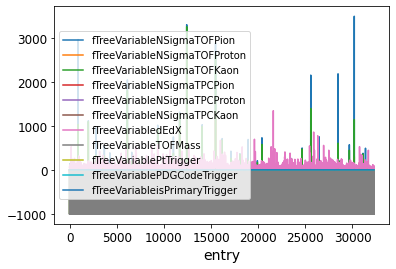

In [52]:
PandaPionDF.plot()

In [ ]:
PandaPionDF["fTreeVariableTOFMass"].value_counts()

In [53]:
PandaPionDF["fTreeVariablePDGCodeTrigger"].value_counts()

0    32274
Name: fTreeVariablePDGCodeTrigger, dtype: int64

In [ ]:
PandaPionDF["fTreeVariableNSigmaTOFPion"].value_counts()

In [ ]:
PandaPionDF["fTreeVariabledEdX"].hist()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
PandaPionDF.hist(bins=100, figsize=(15,15))
save_fig("/content/gdrive/My Drive/FinalExamML/attributes_histogram_plots")
plt.show()

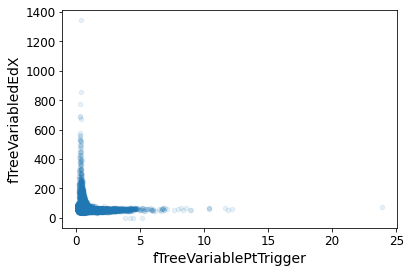

In [47]:
PandaPionDF.plot(kind="scatter", x="fTreeVariablePtTrigger", y="fTreeVariabledEdX", alpha=0.1)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


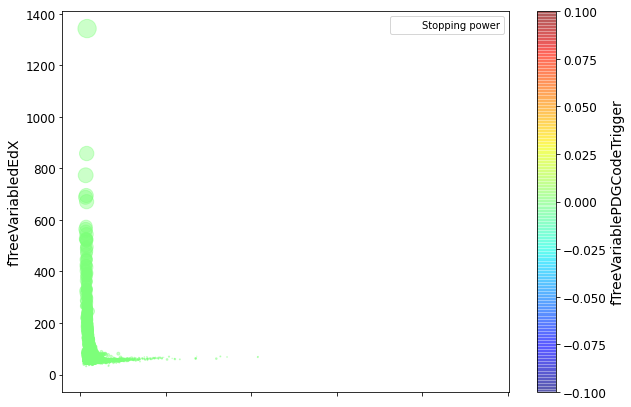

In [55]:
PandaPionDF.plot(kind="scatter", x="fTreeVariablePtTrigger", y="fTreeVariabledEdX", alpha=0.4,
    s=PandaPionDF["fTreeVariableNSigmaTPCPion"], label="Stopping power", figsize=(10,7),
    c="fTreeVariablePDGCodeTrigger", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
#save_fig("/content/gdrive/My Drive/Hands-on/housing_prices_scatterplot")